In [ ]:
conda install scipy matplotlib scikit-learn

In [ ]:
pip install mne --upgrade

In [1]:
import mne
import matplotlib
import matplotlib.pyplot as plt

In [2]:
path = r"nback1.vhdr"
marker = r"nback1.vmrk"

In [3]:
matplotlib.use('Qt5Agg')
# %matplotlib widget
%matplotlib qt
# %gui qt
# mne.viz.set_3d_backend("notebook")

In [4]:
fname= "channel_loc.csv"
# Read a montage from a file.
TUB_montage = mne.channels.read_custom_montage(fname)

In [5]:
# Reader for Brain Vision EEG file.
raw = mne.io.read_raw_brainvision(path, eog=('HEOG', 'VEOG'), preload=True)

Extracting parameters from nback1.vhdr...
Setting channel info structure...


C:\Users\ayush\AppData\Local\Temp\ipykernel_9352\269569590.py:2: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1000.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(path, eog=('HEOG', 'VEOG'), preload=True)


Reading 0 ... 701439  =      0.000 ...   701.439 secs...


In [6]:
# Set EEG channel positions and digitization points.
raw.set_montage(TUB_montage)
print(raw.set_montage)

<bound method set_montage of <RawBrainVision | nback1.eeg, 30 x 701440 (701.4 s), ~160.6 MB, data loaded>>


C:\Users\ayush\AppData\Local\Temp\ipykernel_9352\3371145509.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(TUB_montage)


In [7]:
raw.info
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, AFF5, AFz, F1, FC5, FC1, T7, C3, Cz, CP5, CP1, P7, P3, Pz, ...
 chs: 28 EEG, 2 EOG
 custom_ref_applied: False
 dig: 28 items (28 EEG)
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2016-05-26 12:38:27 UTC
 nchan: 30
 projs: []
 sfreq: 1000.0 Hz
>


Using matplotlib as 2D backend.


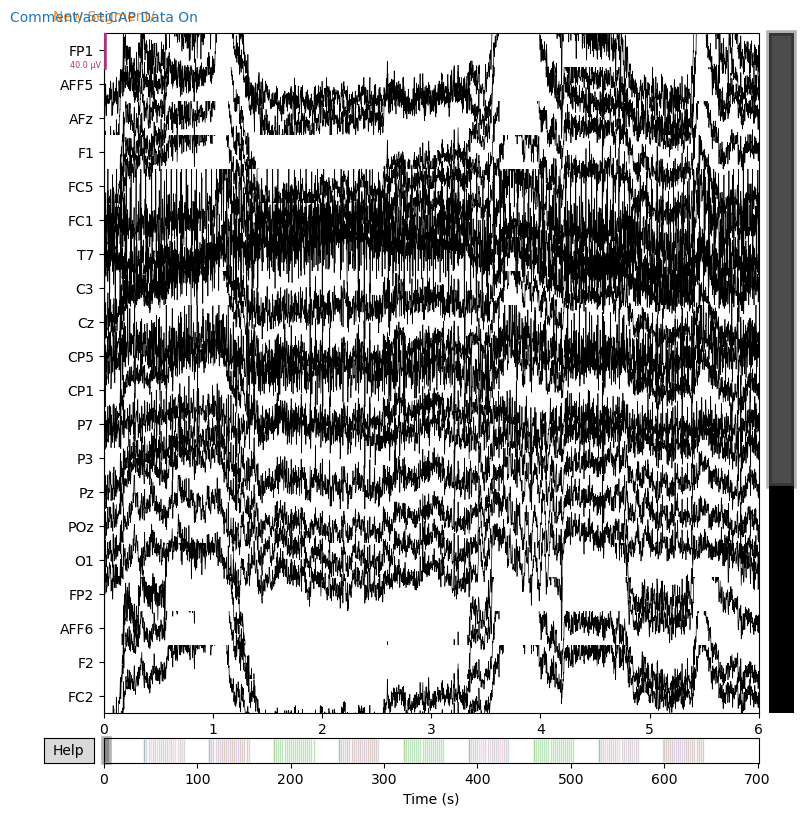

Channels marked as bad:
none


In [8]:
# Plotting raw data.
raw.plot(start=0, duration=6)

In [9]:
# read annotations from a file.
mrk = mne.read_annotations(marker, sfreq='auto', uint16_codec=None)
print(mrk)

Finding 'sfreq' from header file: C:\Users\ayush\Desktop\DRDO\nback1.vhdr
<Annotations | 191 segments: Comment/actiCAP Data On (1), New Segment/ ...>


In [10]:
raw_filtered = raw.copy().filter(l_freq=0.1 , h_freq= 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.1s finished


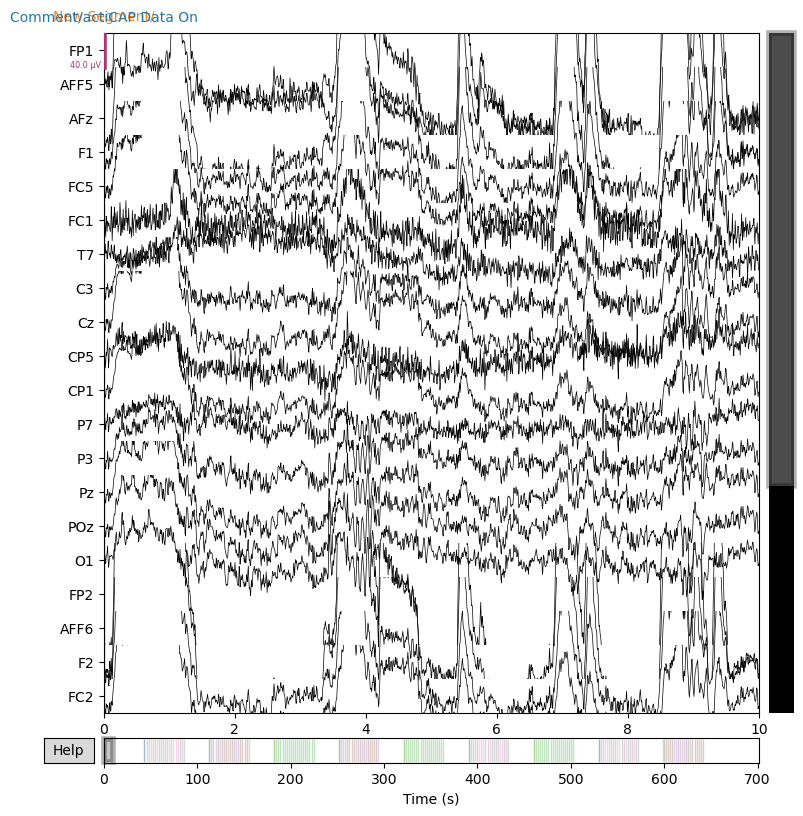

Channels marked as bad:
none


In [11]:
raw_filtered.plot()

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.7s finished


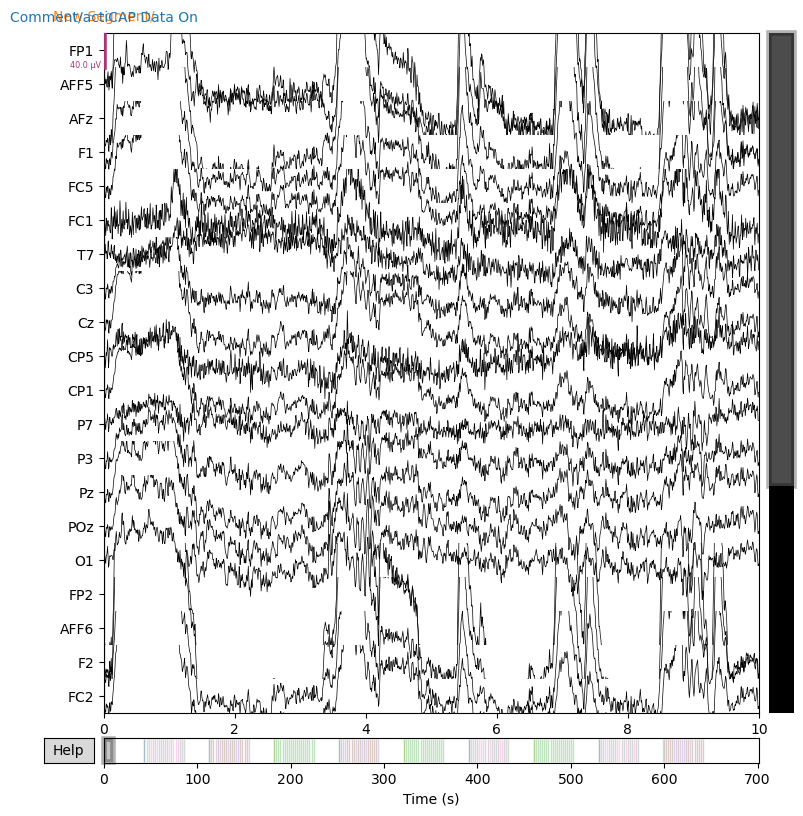

Channels marked as bad:
none


In [12]:
# Notch filter for the signal x.
# Applies a zero-phase notch filter to the signal x, operating on the last dimension.

raw_notch_filtered = raw_filtered.notch_filter(50, filter_length='auto', phase='zero')
raw_notch_filtered.plot()          
            

In [13]:
raw_re_referenced = mne.set_eeg_reference(raw_notch_filtered,ref_channels='average',copy=True, projection=False)
finData, times = raw_re_referenced[:]
print(finData)
print(times)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
<RawBrainVision | nback1.eeg, 30 x 701440 (701.4 s), ~160.6 MB, data loaded>
[-1.69406589e-21 -2.55789593e-07 -4.42551746e-07 ...  2.67111363e-06
  1.37934545e-06  2.00384503e-21]


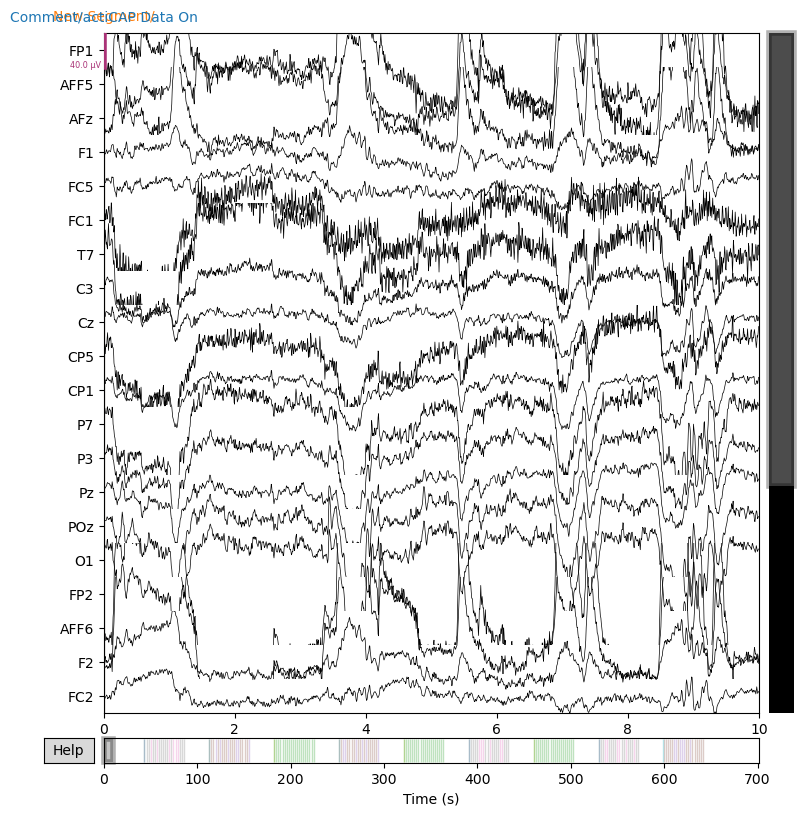

Channels marked as bad:
none


In [14]:
finData.plot()

In [15]:
fig, ax = plt.subplots(2)
print("fig")
print(fig)
print("ax")
print(ax)
raw.plot_psd(ax=ax[0], show = False, fmax = 60)
finData.plot_psd(ax=ax[1], show = False, fmax=60)
ax[0].set_title("PSD before filtering")
ax[1].set_title("PSD after filtering")
ax[1].set_xlabel('Frequency(Hz)')
fig.set_tight_layout(True)
plt.show()

fig
Figure(640x480)
ax
[<AxesSubplot:> <AxesSubplot:>]
Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


Effective window size : 2.048 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
C:\Users\ayush\anaconda3\lib\site-packages\ipykernel\eventloops.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.exec_()
C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\evoked.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  event.canvas.draw()
C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\evoked.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  evoked_fig.canvas.draw()
C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\evoked.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might

In [30]:
n_components = 10 #number of components you want to fit # can be either integer which typically implies number of channels - 1 (if applied average reference)
                  #if floating point number (0-1) fraction of total explained variance
method = 'fastica'
max_iter = 100
fit_params = dict(fastica_it = 5)
random_state = 42
ica = mne.preprocessing.ICA(n_components = n_components,
                        method = method,
                        max_iter=max_iter,
                        random_state= random_state
                        )
ica.fit(finData)

Fitting ICA to data using 28 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 15.3s.


Method,fastica
Fit,24 iterations on raw data (701440 samples)
ICA components,10
Explained variance,98.5 %
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


In [34]:
finData.load_data()
ica.plot_sources(finData, show_scrollbars=False)
ica.plot_components(sphere=1)

[<MNEFigure size 975x496 with 10 Axes>]

In [ ]:
#Manual Eye Artifact Removal
ica.exclude = [0, 3]  
reconst_raw = finData.copy()
ica.apply(reconst_raw)

finData.plot(title = "finData")
reconst_raw.plot(title = "Manual")

Using EOG channels: HEOG, VEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 2 ICA components
    Projecting back using 28 PCA components


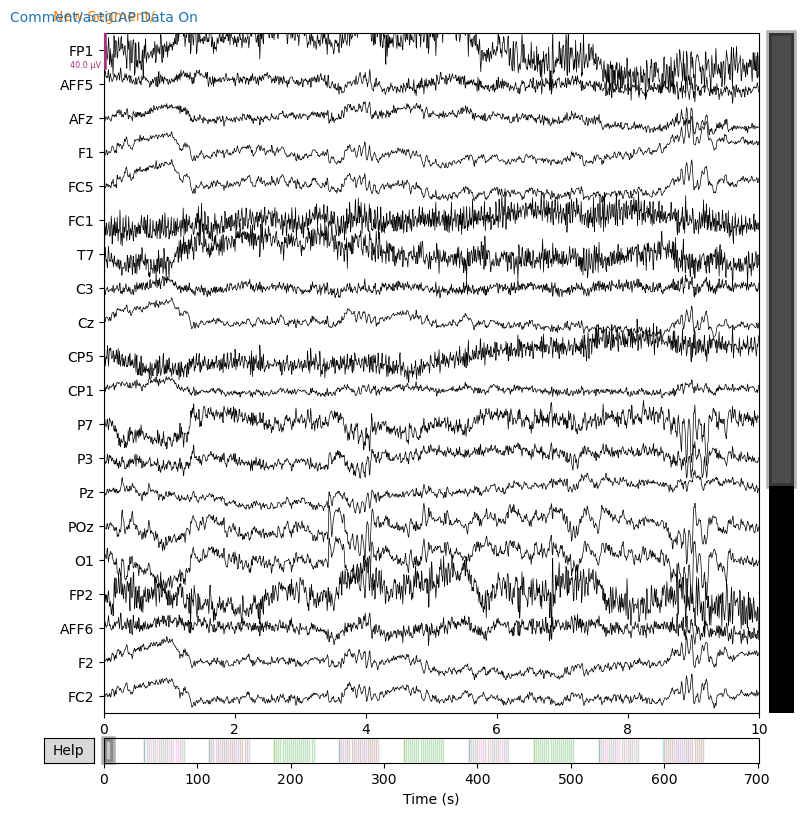

Channels marked as bad:
none


Traceback (most recent call last):
  File "C:\Users\ayush\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 287, in process
    func(*args, **kwargs)
  File "C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\_mpl_figure.py", line 113, in _close
    self.mne.parent_fig.mne.child_figs.remove(self)
ValueError: list.remove(x): x not in list


In [20]:
#Automatic (Threshold Based) Eye Artifact Removal
ica.exclude = []
reconst_raw = finData.copy()
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(finData, threshold = 2.5)
ica.exclude = eog_indices
ica.apply(reconst_raw)

#print(eog_indices)

reconst_raw.plot(title="Automatic")


# # barplot of ICA component "EOG match" scores
# ica.plot_scores(eog_scores)

# # plot diagnostics
# ica.plot_properties(finData, picks=eog_indices)

# # plot ICs applied to raw data, with EOG matches highlighted
# ica.plot_sources(finData, show_scrollbars=False)

# # plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
# ica.plot_sources(eog_evoked)


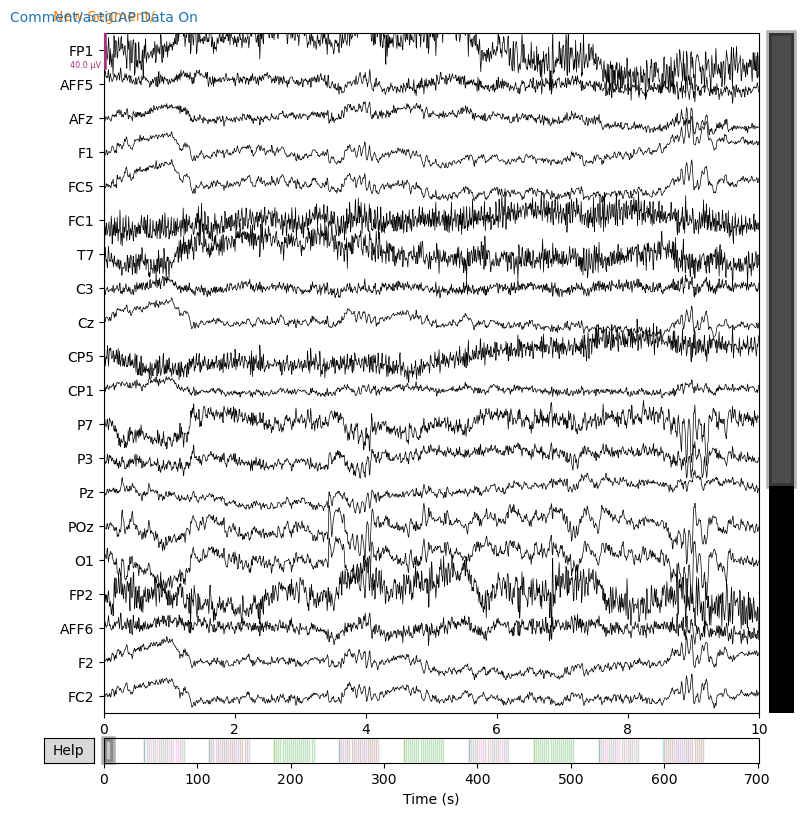

Channels marked as bad:
none


In [21]:
reconst_raw.plot()

In [23]:
events_ids = {
 'Stimulus/S 16': 16,
 'Stimulus/S 48': 48,
 'Stimulus/S 64': 64,
 'Stimulus/S 80': 80,
 'Stimulus/S 96': 96}
events_ids

{'Stimulus/S 16': 16,
 'Stimulus/S 48': 48,
 'Stimulus/S 64': 64,
 'Stimulus/S 80': 80,
 'Stimulus/S 96': 96}

In [24]:
event,event_ids = mne.events_from_annotations(reconst_raw, events_ids)

Used Annotations descriptions: ['Stimulus/S 16', 'Stimulus/S 48', 'Stimulus/S 64', 'Stimulus/S 80', 'Stimulus/S 96']


In [25]:
event_ids

{'Stimulus/S 16': 16,
 'Stimulus/S 48': 48,
 'Stimulus/S 64': 64,
 'Stimulus/S 80': 80,
 'Stimulus/S 96': 96}

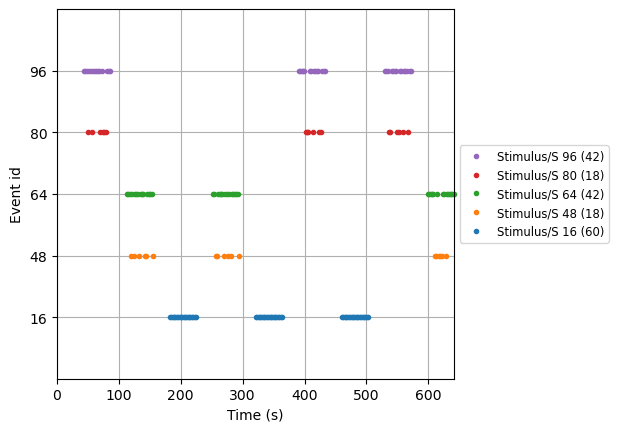

In [26]:
mne.viz.plot_events(event,event_id = events_ids, sfreq=raw.info['sfreq'])

In [27]:
tmin=-0.3 # when does the epoch start relative to the event onset # 300ms before the start of the event
tmax=1.7  # when does the event end after the even onset # 500 ms from the start of the event

#Is a tuple containing the start of the baseline and end of the baseline
baseline= (None, 0) #None mean begnining of the event and 0 is the start of the event 

epochs = mne.Epochs(reconst_raw, 
                    events=event,
                    event_id=event_ids,
                    tmin=tmin,tmax=tmax, 
                    baseline=baseline,
                    preload=True,event_repeated = 'drop')

Not setting metadata
180 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 180 events and 2001 original time points ...
0 bad epochs dropped


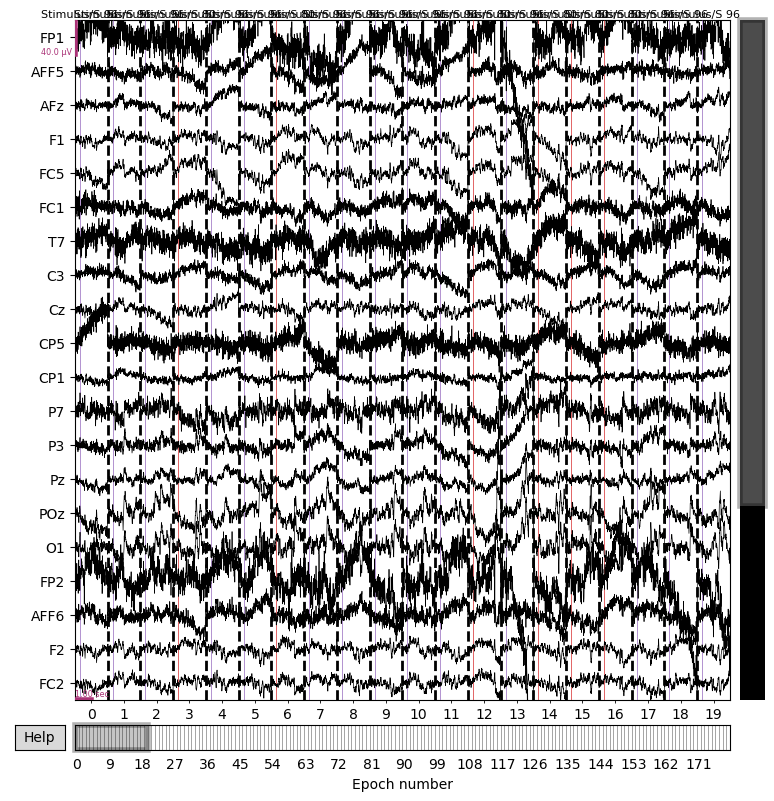

In [28]:
epochs.plot(events=event, event_id = event_ids)

In [29]:
e3=event[:,-1]
e4 = np.repeat(e3,2001, axis=0)
e5 = np.reshape(e4,(180,2001))

NameError: name 'np' is not defined

In [ ]:
import numpy as np
j=0
dat = []
for i in epochs:
    dat.append(np.concatenate((i,e5[j].reshape(1,-1)),axis=0))
    j+=1
dat = np.array(dat)
print(dat)

In [ ]:
dat.shape